Autores

Rodrigo Makoto Takumi 176897

Carlos Augusto Jardim Chiarelli 165685

# **16 – Projeto de controladores: método da análise em frequência**

In [1]:
# bibliotecas
import numpy as np
import sympy as sp
import matplotlib.pyplot       as plt
import control                 as clt
import control.matlab as ml
from   numpy                   import sqrt
from   scipy.signal            import lsim, lti, step, impulse, freqresp, bode
from   scipy                   import spatial
from   IPython.core.pylabtools import figsize
from   IPython.display         import Image
from   platform                import python_version

figsize(12, 8)                         # tamanho gráficos
plt.rcParams.update({'font.size': 14}) # tamanho da fonte
sp.init_printing()                     # printar variáveis simbólicas

print('\nVersão da Linguagem Python usada neste relatório: %s\n' % python_version())


Versão da Linguagem Python usada neste relatório: 3.7.6



In [ ]:
def plotaResposta(t, saida, entrada, titulo, yLabel, cor):
    # visulizando resposta
    plt.plot(t, saida,   label='y(t)', color=cor)

    plt.title(titulo+' \n')
    plt.xlabel('\n Tempo (s)')
    plt.ylabel(yLabel +  '\n')
    plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
    plt.show()

# **QUESTÃO 01**

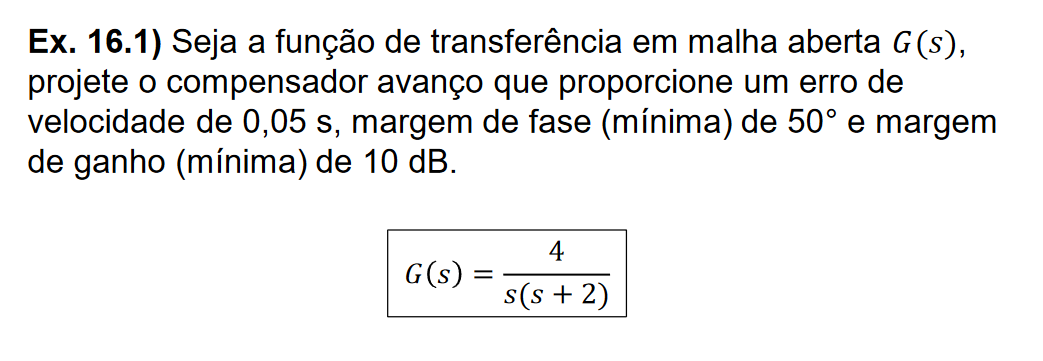

In [2]:
Image('../dados/imagens/16_exe_1.png')

Sabemos que a função de transferência do compensador avançado é:

$$ D(s) = K_{c}\alpha\frac{T_{s} + 1}{\alpha T_{s} + 1} $$

onde $\alpha$ < 1.

Do enunciado temos que a constante de erro estatístico da velocidade é:

$$ e_{ss} = 0.05 $$

Sabemos que:

$$ K_{v} = \lim_{s -> 0}sKG(s) = 2K $$
$$ K_{c}\alpha = 10 $$

Margens de estabilidade de KG(s):

• GM = $\infty$;

• PM = 18$^\circ$;

• Margem de fase desejada: 50$^\circ$ + 5$^\circ$ = 55$^\circ$;

• Incremento de fase necessário:
$$ \phi_{m} = 55^\circ - 18^\circ = 37^\circ$$

No handles with labels found to put in legend.


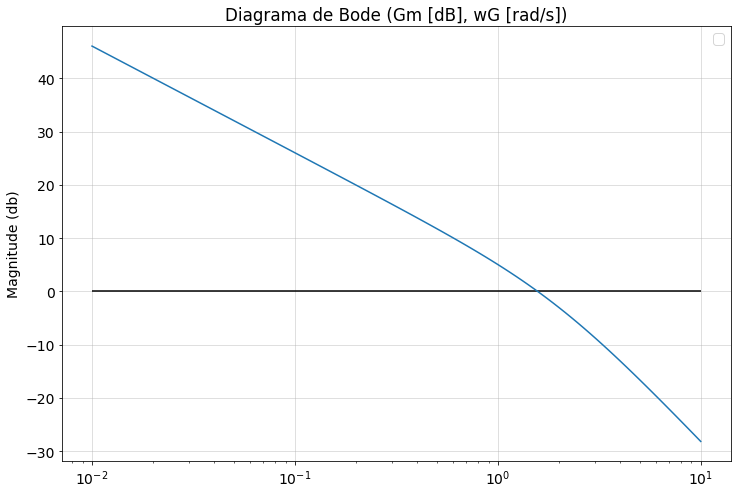

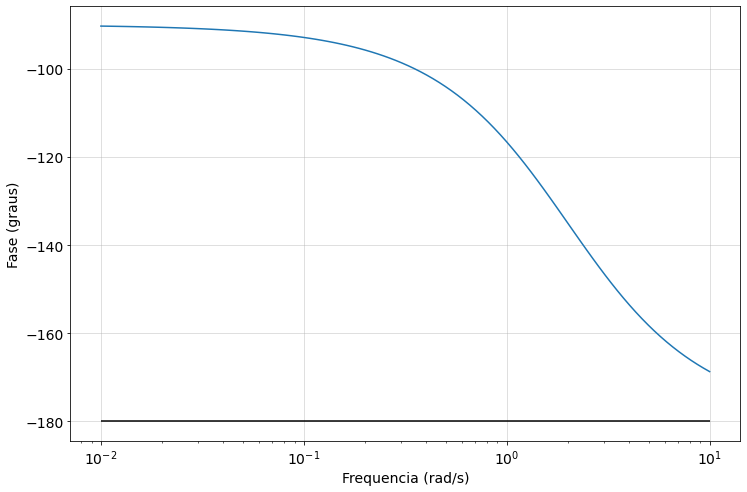

In [ ]:
tf = ([4], [1,2,0])
gm, pm, wg, wp = clt.margin(clt.tf(tf[0], tf[1]))

w, mag, phase = bode(tf)

plt.figure()
plt.semilogx(w, mag)   # Bode magnitude plot
# plt.plot(wp, pm, marker='o', label=f'wp, pm = {round(wp,2)}, {round(pm,2)}')
# plt.plot(wg, gm, marker='o', label=f'wg, gm = {round(wg,2)}, {round(gm,2)}')
plt.hlines(0, w[0], w[len(w)-1])
plt.grid(alpha=.5)
plt.title('Diagrama de Bode (Gm [dB], wG [rad/s])')
plt.ylabel('Magnitude (db)')
plt.legend()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.hlines(-180, w[0], w[len(w)-1])
plt.ylabel('Fase (graus)')
plt.xlabel('Frequencia (rad/s)')
plt.grid(alpha=.5)

plt.show()

Cálulo de $\alpha$ < 1:

$$ \alpha = \frac{1 - \sin \phi_{m}}{1 + \sin \phi_{m}} = 0.249 $$

Frequência de cruzamento de ganho:

$$ \left|\frac{1}{\sqrt\alpha}\right| = |2.00| = |6.05| dB $$

Do diagrama de Bode, o cruzamento em -6.05 dB ocorre em $\omega_{c} = 8.85 rad/s, portanto:

$$ T = \frac{1}{\omega_{c} \sqrt\alpha} = 0.23 $$

Compensador:

$$ D(s) = K_{c}\alpha\frac{T_{s} + 1}{\alpha T_{s} + 1} = 10\frac{0.2266s + 1}{0.05634s + 1}$$


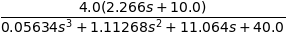

In [ ]:
#Planta
s = sp.symbols('s')

GsNumerador = 4
GsDenominador = s*s + 2*s 
Gs = GsNumerador/GsDenominador

DsNumerador = 2.266*s + 10
DsDenominador = 0.05634*s + 1

Ds = DsNumerador/DsDenominador

HsNumerador = Ds*Gs
HsDenominador = 1 + Ds*Gs

Hs = HsNumerador/HsDenominador

sp.factor(Hs, s) 

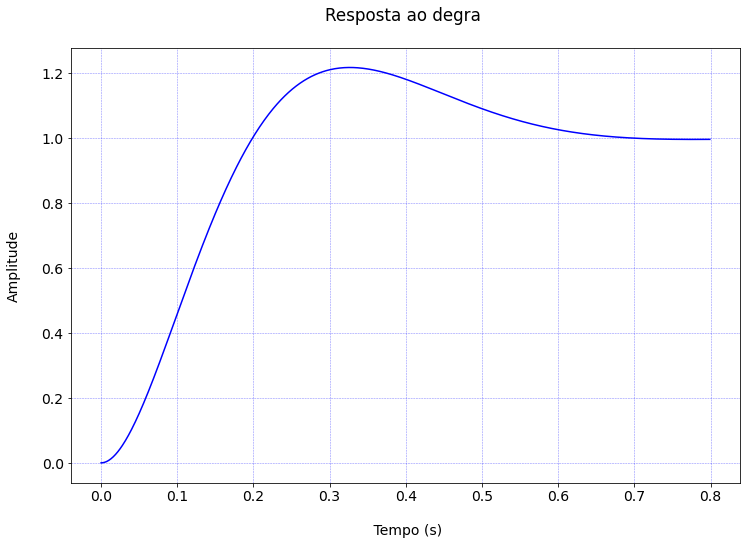

In [ ]:
# vetor de tempo
dt = 1e-3
tr  = np.arange(0, 0.8, dt)

numeradorGs = [8.932, 40]
denominadorGs = [0.05634, 1.11268, 11.064, 40]

Gs = (numeradorGs, denominadorGs)

LTI = lti(numeradorGs, denominadorGs) # gerando o sistema

t_step, y_step = step(LTI, T=tr)      # resposta ao degrau

r = np.ones(len(tr))                   

plotaResposta(t_step, y_step, r, 'Resposta ao degra', 'Amplitude', 'b')

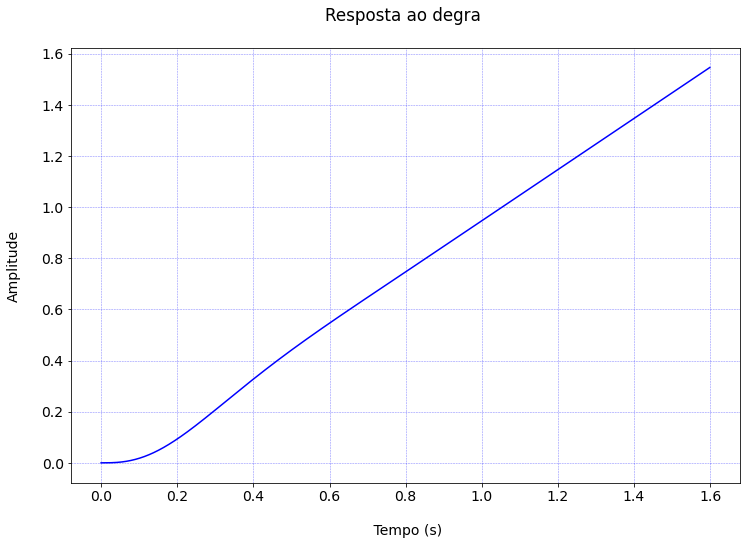

In [ ]:
tr  = np.arange(0, 1.6, dt)

numeradorGs = [8.932, 40]
denominadorGs = [0.05634, 1.11268, 11.064, 40, 0]

Gs = (numeradorGs, denominadorGs)

LTI = lti(numeradorGs, denominadorGs) # gerando o sistema

t_step, y_step = step(LTI, T=tr)      # resposta ao degrau

r = np.ones(len(tr))                   

plotaResposta(t_step, y_step, r, 'Resposta ao degra', 'Amplitude', 'b')

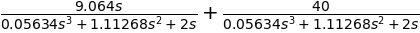

In [ ]:
sp.expand(HsNumerador, s)

No handles with labels found to put in legend.


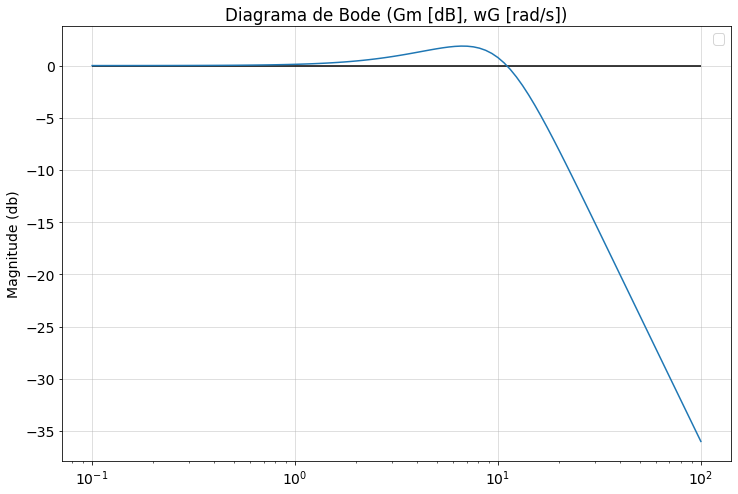

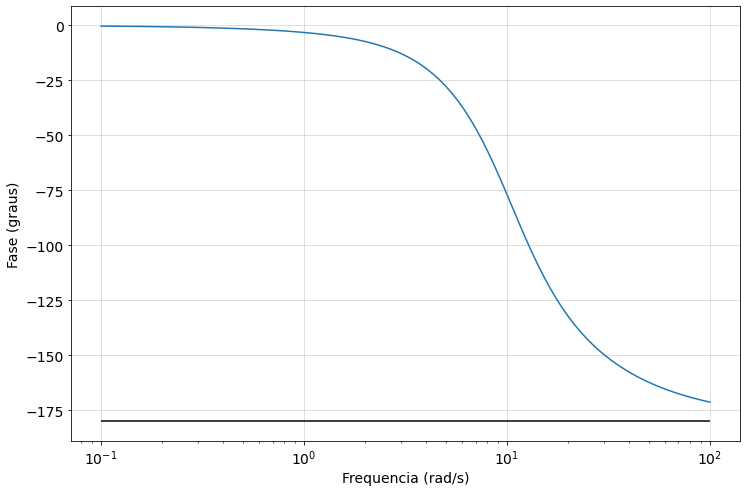

In [ ]:
tf = ([8.932, 40], [0.05634, 1.11268, 11.064, 40])
gm, pm, wg, wp = clt.margin(clt.tf(tf[0], tf[1]))

w, mag, phase = bode(tf)

plt.figure()
plt.semilogx(w, mag)   # Bode magnitude plot
plt.hlines(0, w[0], w[len(w)-1])
plt.grid(alpha=.5)
plt.title('Diagrama de Bode (Gm [dB], wG [rad/s])')
plt.ylabel('Magnitude (db)')
plt.legend()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.hlines(-180, w[0], w[len(w)-1])
plt.ylabel('Fase (graus)')
plt.xlabel('Frequencia (rad/s)')
plt.grid(alpha=.5)

plt.show()

Margem estabilizadora:

• 𝐺𝑀 = ∞ > 10 dB;

• 𝑃𝑀 = 92.8° > 50°.

$$$$
# **QUESTÃO 02**

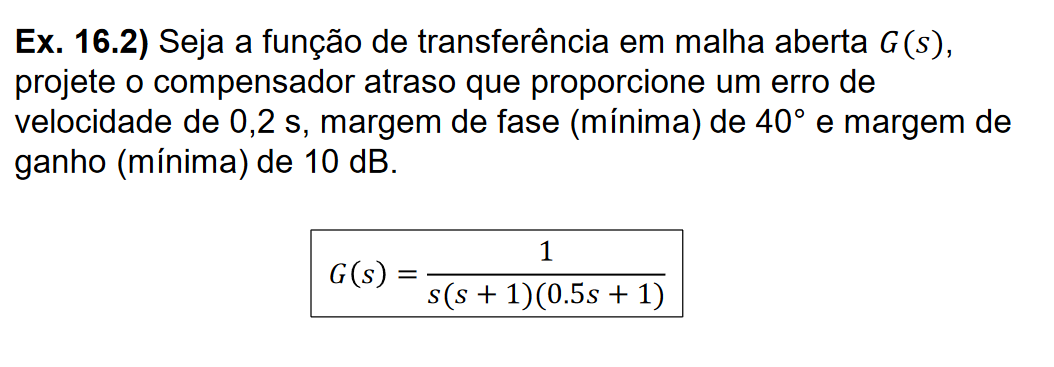

In [3]:
Image('../dados/imagens/16_exe_2.png')



Seja a função de transferência em malha aberta 𝐺(𝑠), projete o compensador atraso que proporcione um erro de velocidade de 0,2 s, margem de fase (mínima) de 40° e margem de ganho (mínima) de 10 dB.
$$$$

$$ G(s) = \frac{1}{s(s + 1)(0.5s + 1)} $$

Compensador:

$$ D(s) = K_{c}\beta\frac{T_{s} + 1}{\beta T_{s} + 1}$$

Erro estacinário à rampa:

$$Sabendo\ que\ K_{c} = \frac{1}{e_{ss}}\ e\ e_{ss} = 0.5,\ temos: $$
$$ K_{v} = 2 $$

$$$$

$$ K_{v} = \lim_{s -> 0}sKG(s) = K $$
$$ K_{c}\beta = 5 $$

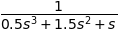

In [ ]:
s = sp.symbols('s')

GsNumerador = 1
GsDenominador = s*(s + 1)*(0.5*s + 1)
Gs = GsNumerador/GsDenominador

sp.expand(Gs, s)

No handles with labels found to put in legend.


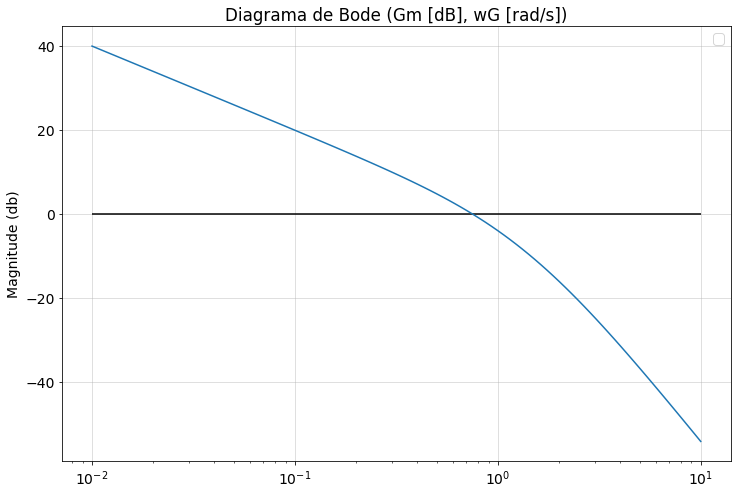

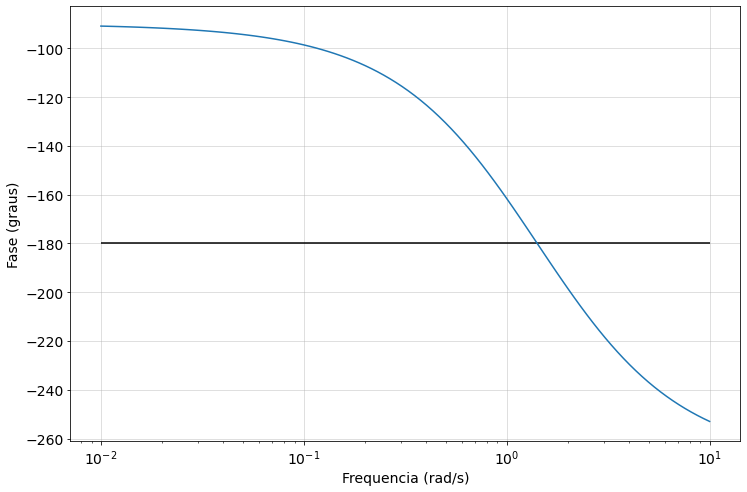

In [ ]:
tf = ([1], [0.5, 1.5, 1, 0])
gm, pm, wg, wp = clt.margin(clt.tf(tf[0], tf[1]))

w, mag, phase = bode(tf)

plt.figure()
plt.semilogx(w, mag)   # Bode magnitude plot
plt.hlines(0, w[0], w[len(w)-1])
plt.grid(alpha=.5)
plt.title('Diagrama de Bode (Gm [dB], wG [rad/s])')
plt.ylabel('Magnitude (db)')
plt.legend()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.hlines(-180, w[0], w[len(w)-1])
plt.ylabel('Fase (graus)')
plt.xlabel('Frequencia (rad/s)')
plt.grid(alpha=.5)

plt.show()

Margens de estabilidade:

Fazendo $\omega = 0.05 rad/s$ - uma década abaixo de $\omega_{c}$, temos:
$$ T = \frac{1}{\omega} = 20 $$

Para que a atenuação seja 0 dB em $\omega_{c} = 0.5 rad/s$, é necessário um ganho de -19 dB. Assim, calculando $\beta > 1$:
$$ -19 = -20\log{\beta}$$
$$\beta = 8.9$$


Compensador atraso:

$$ D(s) = 5\frac{20s + 1}{178s + 1} $$


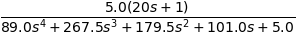

In [ ]:
#Planta
s = sp.symbols('s')

GsNumerador = 1
GsDenominador = s*(s + 1)*(0.5*s + 1)
Gs = GsNumerador/GsDenominador

DsNumerador = 100*s + 5
DsDenominador = 178*s + 1

Ds = DsNumerador/DsDenominador

HsNumerador = Ds*Gs
HsDenominador = 1 + Ds*Gs

Hs = HsNumerador/HsDenominador

sp.factor(Hs, s) 

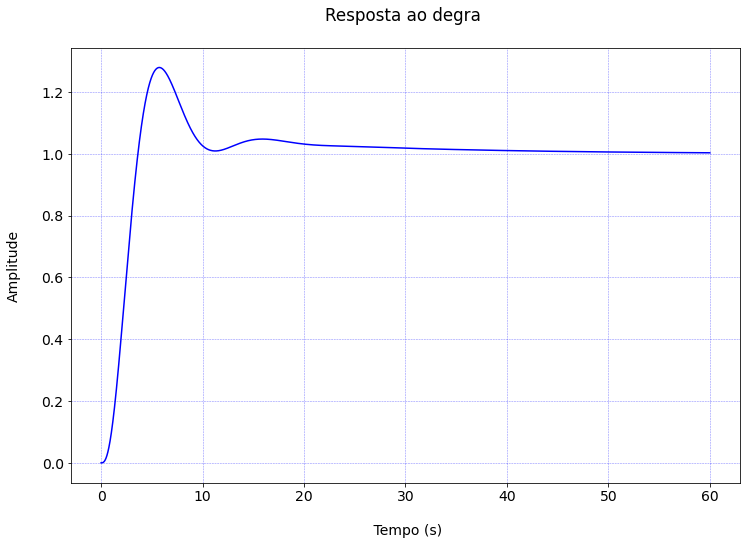

In [ ]:
# vetor de tempo
dt = 1e-3
tr  = np.arange(0, 60, dt)

numeradorGs = [100, 5]
denominadorGs = [89, 267.5, 179.5, 101, 5]

Gs = (numeradorGs, denominadorGs)

LTI = lti(numeradorGs, denominadorGs) # gerando o sistema

t_step, y_step = step(LTI, T=tr)      # resposta ao degrau

r = np.ones(len(tr))                   

plotaResposta(t_step, y_step, r, 'Resposta ao degra', 'Amplitude', 'b')

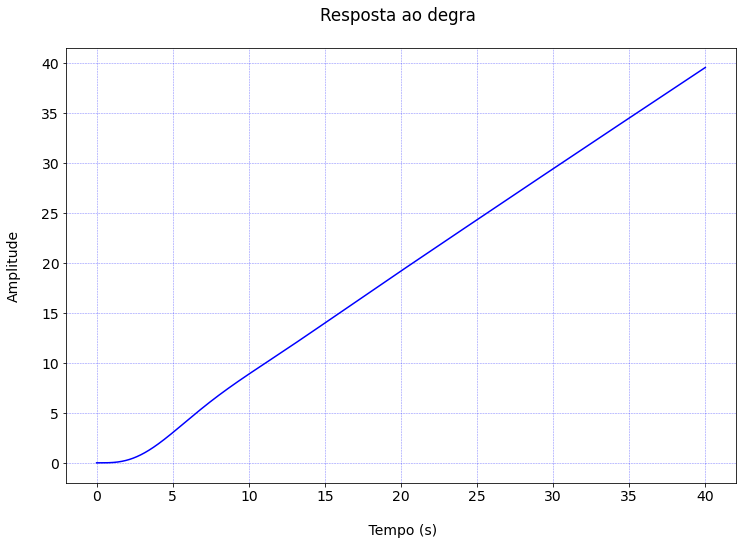

In [ ]:
tr  = np.arange(0, 40, dt)

numeradorGs = [100, 5]
denominadorGs = [89, 267.5, 179.5, 101, 5, 0]

Gs = (numeradorGs, denominadorGs)

LTI = lti(numeradorGs, denominadorGs) # gerando o sistema

t_step, y_step = step(LTI, T=tr)      # resposta ao degrau

r = np.ones(len(tr))                   

plotaResposta(t_step, y_step, r, 'Resposta ao degra', 'Amplitude', 'b')

No handles with labels found to put in legend.


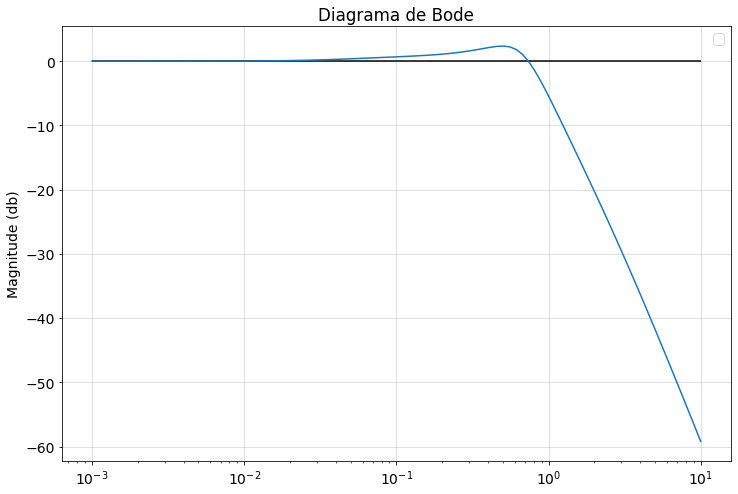

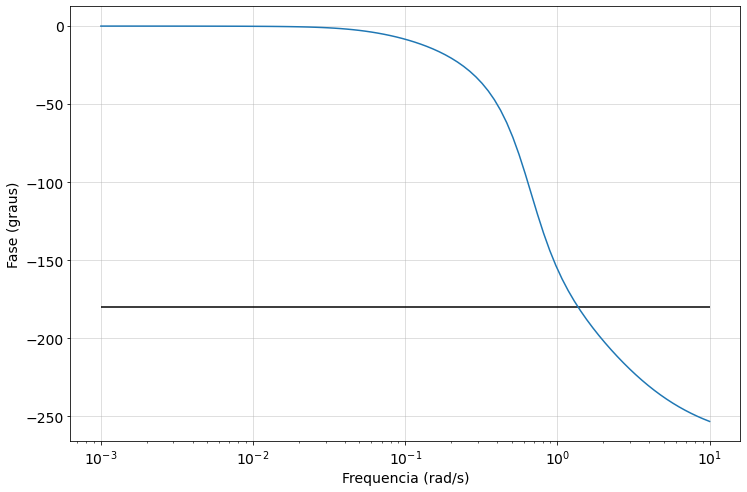

In [ ]:
tf = ([100, 5], [89, 267.5, 179.5, 101, 5])
gm, pm, wg, wp = clt.margin(clt.tf(tf[0], tf[1]))

w, mag, phase = bode(tf)

plt.figure()
plt.semilogx(w, mag)   # Bode magnitude plot
plt.hlines(0, w[0], w[len(w)-1])
plt.grid(alpha=.5)
plt.title('Diagrama de Bode')
plt.ylabel('Magnitude (db)')
plt.legend()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.hlines(-180, w[0], w[len(w)-1])
plt.ylabel('Fase (graus)')
plt.xlabel('Frequencia (rad/s)')
plt.grid(alpha=.5)

plt.show()

Margem estabilizadora:

• 𝐺𝑀 = 12dB > 10 dB;

• 𝑃𝑀 = 60° > 40°;

• Asmargensatendem às especificações.

$$$$
# **QUESTÃO 03**

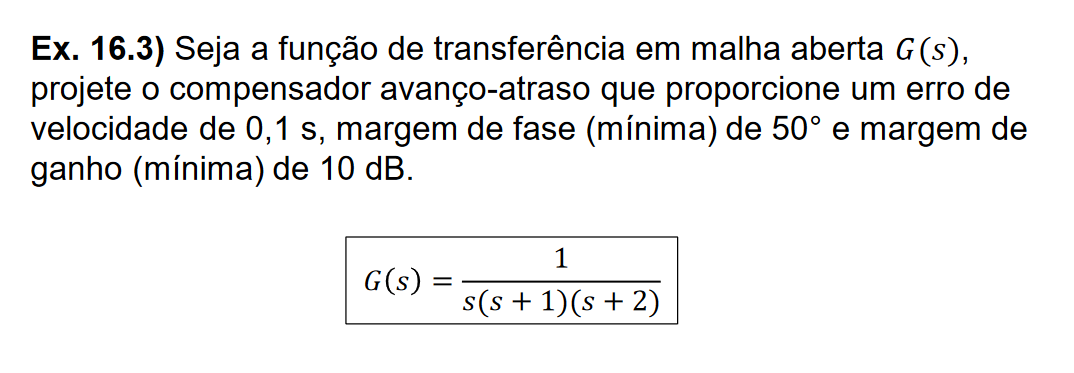

In [4]:
Image('../dados/imagens/16_exe_3.png')



Seja a função de transferência em malha aberta 𝐺(𝑠), projete o compensador avanço-atraso que proporcione um erro de velocidade de 0,1 s, margem de fase (mínima) de 50° e margem de ganho (mínima) de 10 dB.

$$$$

$$ G(s) = \frac{1}{s(s + 1)(s + 2)} $$

Compensador avanço-atraso $(\gamma = \beta > 1)$
$$ D(s) = K_{c}\frac{s + \frac{1}{T_{1}}}{s + \frac{\beta}{T_{2}}} \frac{s + \frac{1}{T_{2}}}{s + \frac{1}{\beta T_{2}}} $$

Erro estacionário à rampa:

$$Sabendo\ que\ K_{c} = \frac{1}{e_{ss}}\ e\ e_{ss} = 0.1,\ temos: $$
$$ K_{v} = 10 $$

$$$$

$$ K_{v} = \lim_{s -> 0}sKG(s) = \frac{K}{2} $$
$$ K = K_{c} = 20 $$

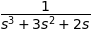

In [ ]:
s = sp.symbols('s')

GsNumerador = 1
GsDenominador = s*(s + 1)*(s + 2)
Gs = GsNumerador/GsDenominador

sp.expand(Gs)

No handles with labels found to put in legend.


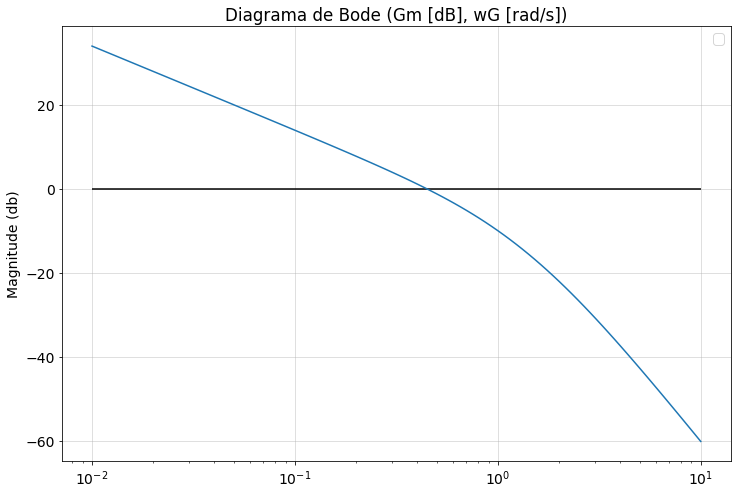

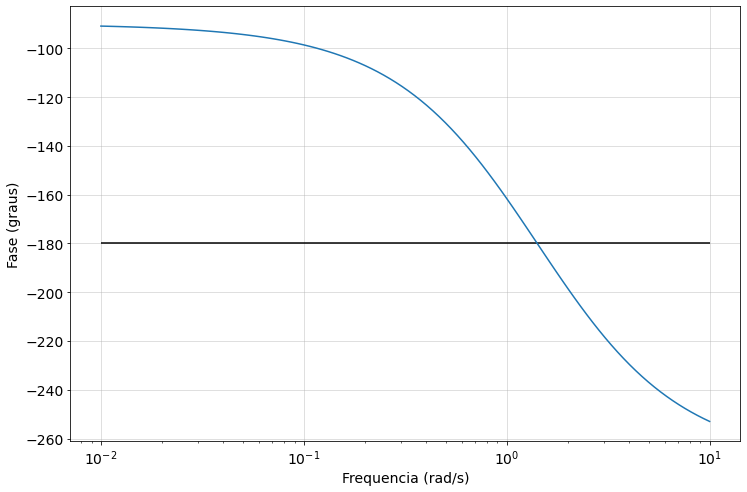

In [ ]:
tf = ([1], [1, 3, 2, 0])
gm, pm, wg, wp = clt.margin(clt.tf(tf[0], tf[1]))

w, mag, phase = bode(tf)

plt.figure()
plt.semilogx(w, mag)   # Bode magnitude plot
plt.hlines(0, w[0], w[len(w)-1])
plt.grid(alpha=.5)
plt.title('Diagrama de Bode')
plt.ylabel('Magnitude (db)')
plt.legend()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.hlines(-180, w[0], w[len(w)-1])
plt.ylabel('Fase (graus)')
plt.xlabel('Frequencia (rad/s)')
plt.grid(alpha=.5)

plt.show()

Margens de estabilidade:

• Cálculo de $T_{2}$:
$$ T_{2} = \frac{1}{\omega} = 7.14 $$
$$$$

• Cálulo de $\beta$:

$$ Requisito\ de\ margem\ de\ fase: \phi_{m} = 50 + 10 = 60°$$

$$ \alpha = \frac{1 - \sin \phi_{m}}{1 + \sin \phi_{m}} = 0.07 $$

$$ Como\ \beta = \frac{1}{\alpha}, temos\ que\ \beta = 13.93$$

• Cálculo de $T_{1}$:
$$ \left|\frac{1}{\sqrt{\alpha}}\right| = |3.73| = |11.43| dB $$
$$ A\ magnitude\ é\ 11,43 dB\ em\ \omega = 1.37 rad/s; $$
$$ T_{1} = \frac{1}{\omega_{c} \sqrt{\alpha}} = 2.72 $$

Compensador avanço-atraso:

$$ D(s) = 20\frac{s + 0.37}{s + 5.10}\frac{s + 0.14}{s + 0.01} $$

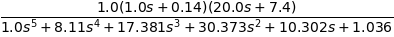

In [ ]:
#Planta
s = sp.symbols('s')

GsNumerador = 1
GsDenominador = s*(s + 1)*(s + 2)
Gs = GsNumerador/GsDenominador

DsNumerador = 20*(s + 0.37)*(s + 0.14)
DsDenominador = (s + 5.10)*(s + 0.01)

Ds = DsNumerador/DsDenominador

HsNumerador = Ds*Gs
HsDenominador = 1 + Ds*Gs

Hs = HsNumerador/HsDenominador

sp.factor(Hs, s) 

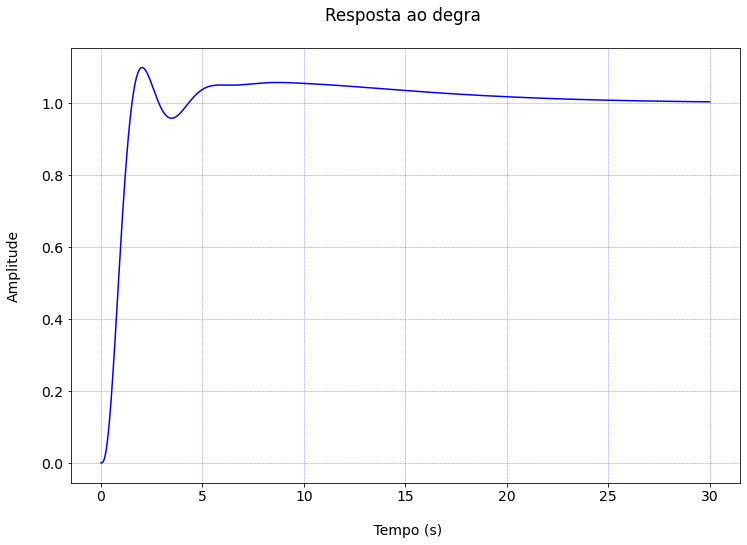

In [ ]:
# vetor de tempo
dt = 1e-3
tr  = np.arange(0, 30, dt)

numeradorGs = [20, 10.2, 1.036]
denominadorGs = [1, 8.11, 17.381, 30.373, 10.302, 1.036]

Gs = (numeradorGs, denominadorGs)

LTI = lti(numeradorGs, denominadorGs) # gerando o sistema

t_step, y_step = step(LTI, T=tr)      # resposta ao degrau

r = np.ones(len(tr))                   

plotaResposta(t_step, y_step, r, 'Resposta ao degra', 'Amplitude', 'b')

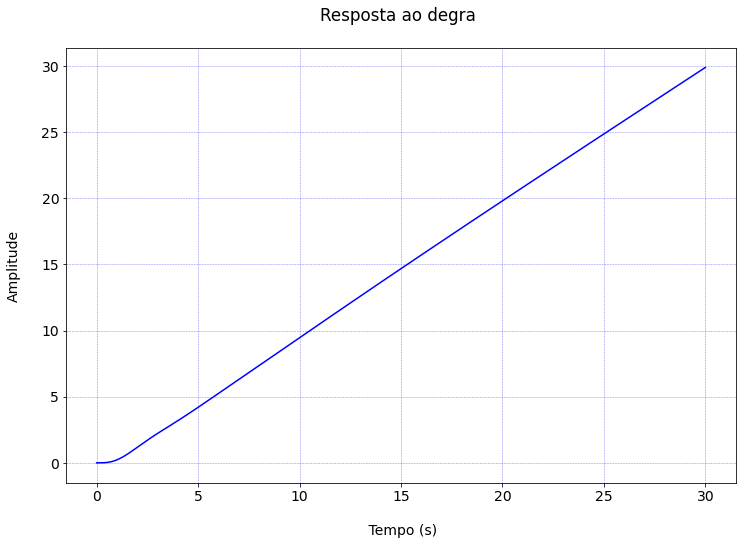

In [ ]:
tr  = np.arange(0, 30, dt)

numeradorGs = [20, 10.2, 1.036]
denominadorGs = [1, 8.11, 17.381, 30.373, 10.302, 1.036, 0]

Gs = (numeradorGs, denominadorGs)

LTI = lti(numeradorGs, denominadorGs) # gerando o sistema

t_step, y_step = step(LTI, T=tr)      # resposta ao degrau

r = np.ones(len(tr))                   

plotaResposta(t_step, y_step, r, 'Resposta ao degra', 'Amplitude', 'b')

No handles with labels found to put in legend.


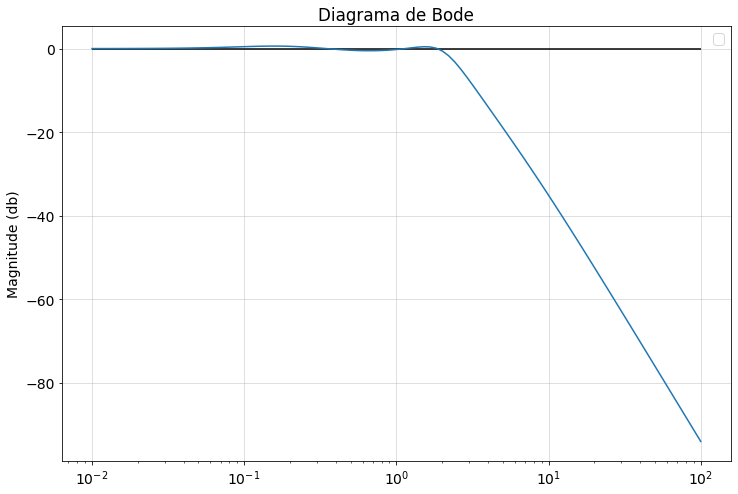

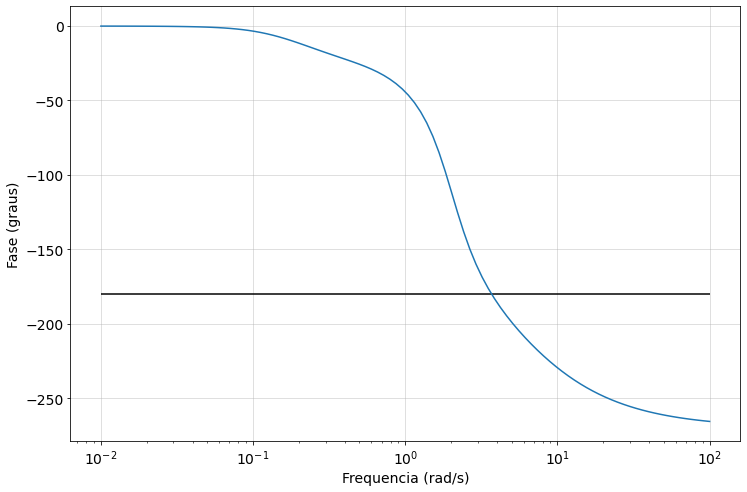

In [ ]:
tf = ([20, 10.2, 1.036], [1, 8.11, 17.381, 30.373, 10.302, 1.036])
gm, pm, wg, wp = clt.margin(clt.tf(tf[0], tf[1]))

w, mag, phase = bode(tf)

plt.figure()
plt.semilogx(w, mag)   # Bode magnitude plot
plt.hlines(0, w[0], w[len(w)-1])
plt.grid(alpha=.5)
plt.title('Diagrama de Bode')
plt.ylabel('Magnitude (db)')
plt.legend()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.hlines(-180, w[0], w[len(w)-1])
plt.ylabel('Fase (graus)')
plt.xlabel('Frequencia (rad/s)')
plt.grid(alpha=.5)

plt.show()

$$$$
# **QUESTÃO 04**

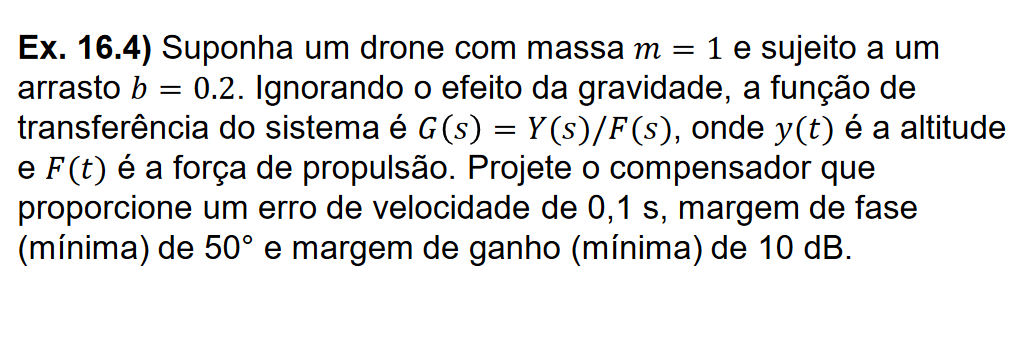

In [5]:
Image('../dados/imagens/16_exe_4.png')



Suponha um drone com massa 𝑚 = 1 e sujeito a um arrasto 𝑏 = 0.2. Ignorando o efeito da gravidade, a função de transferência do sistema é 𝐺 𝑠 = 𝑌(𝑠)/𝐹(𝑠), onde 𝑦(𝑡) é a altitude e 𝐹(𝑡) é a força de propulsão. Projete o compensador que proporcione um erro de velocidade de 0,1 s, margem de fase (mínima) de 50° e margem de ganho (mínima) de 10 dB.

Do enunciado temos:

• Função de transferência:
$$ G(s) = \frac{Y(s)}{F(s)} = \frac{1}{s(ms + b)} = \frac{1}{s(s + 0.2)} $$
$$$$
• Erro estacionário à rampa:

Constante de erro develocidade:
$$ K_{v} = \frac{1}{e_{ss}} = \frac{1}{0.1} = 10$$
$$ K_{v} = \lim_{s -> 0} sKG(s) = \frac{K}{0.2} $$
$$ K = K_{c} = 2 $$

No handles with labels found to put in legend.


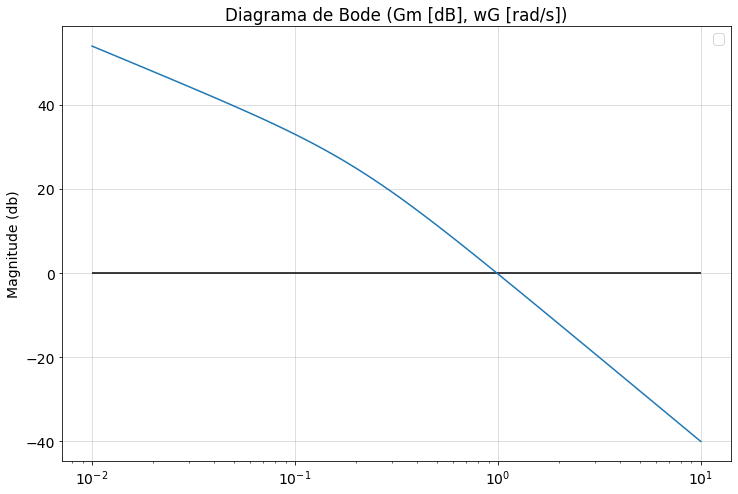

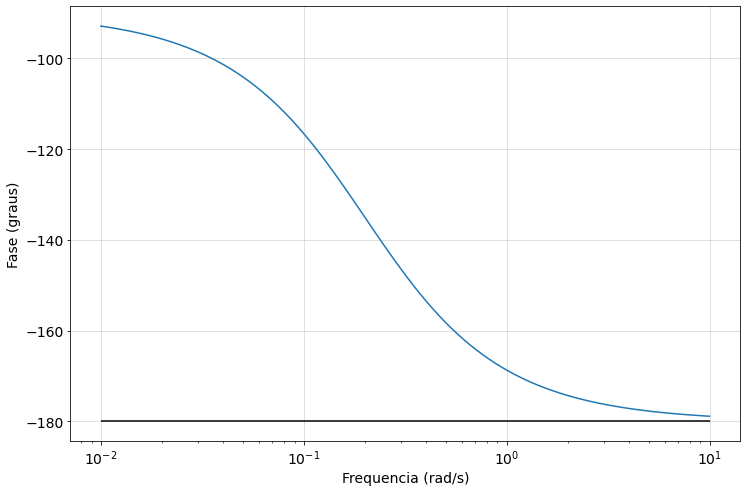

In [ ]:
tf = ([1], [1, 0.2, 0])
gm, pm, wg, wp = clt.margin(clt.tf(tf[0], tf[1]))

w, mag, phase = bode(tf)

plt.figure()
plt.semilogx(w, mag)   # Bode magnitude plot
plt.hlines(0, w[0], w[len(w)-1])
plt.grid(alpha=.5)
plt.title('Diagrama de Bode')
plt.ylabel('Magnitude (db)')
plt.legend()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.hlines(-180, w[0], w[len(w)-1])
plt.ylabel('Fase (graus)')
plt.xlabel('Frequencia (rad/s)')
plt.grid(alpha=.5)

plt.show()

Margens de estabilidade:

• Margem de fase desejada: 50 + 10 = 60°;

• Incremento de fase necessário: $\phi_{m}$ = 60 − 8.1 = 51.9°;

• $\alpha$ = 0.1192;

• 20 $\log\alpha$ = 9.23 dB -> $\omega_{c}$ ≈ 2.5 rad/s;

• $T$ = 1.1584;

$$ D(s) = K_{c}\alpha\frac{Ts + 1}{\alpha Ts + 1} = 2\frac{1.16s + 1}{0.14s + 1}$$

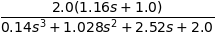

In [ ]:
#Planta
s = sp.symbols('s')

GsNumerador = 1
GsDenominador = s*(s + 0.2)
Gs = GsNumerador/GsDenominador

DsNumerador = 2*(1.16*s + 1)
DsDenominador = 0.14*s + 1

Ds = DsNumerador/DsDenominador

HsNumerador = Ds*Gs
HsDenominador = 1 + Ds*Gs

Hs = HsNumerador/HsDenominador

sp.factor(Hs, s)

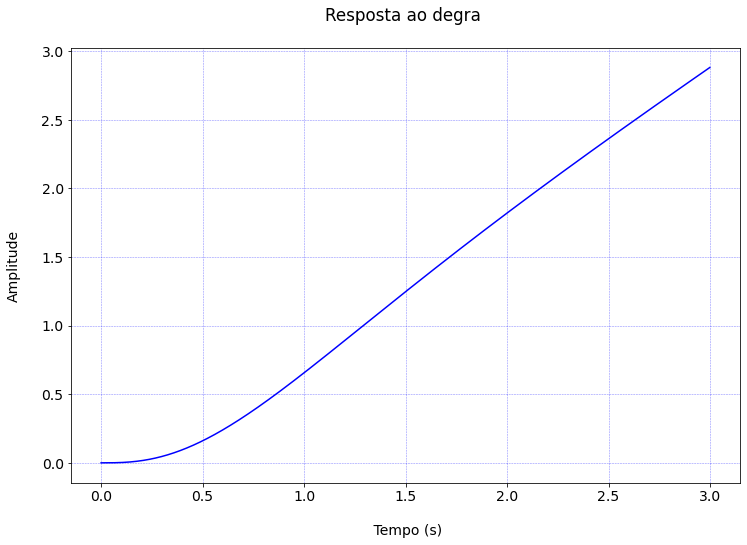

In [ ]:
# vetor de tempo
dt = 1e-3
tr  = np.arange(0, 3, dt)

numeradorGs = [2.32, 2]
denominadorGs = [0.14, 1.028, 2.52, 2, 0]

Gs = (numeradorGs, denominadorGs)

LTI = lti(numeradorGs, denominadorGs) # gerando o sistema

t_step, y_step = step(LTI, T=tr)      # resposta ao degrau

r = np.ones(len(tr))                   

plotaResposta(t_step, y_step, r, 'Resposta ao degra', 'Amplitude', 'b')

No handles with labels found to put in legend.


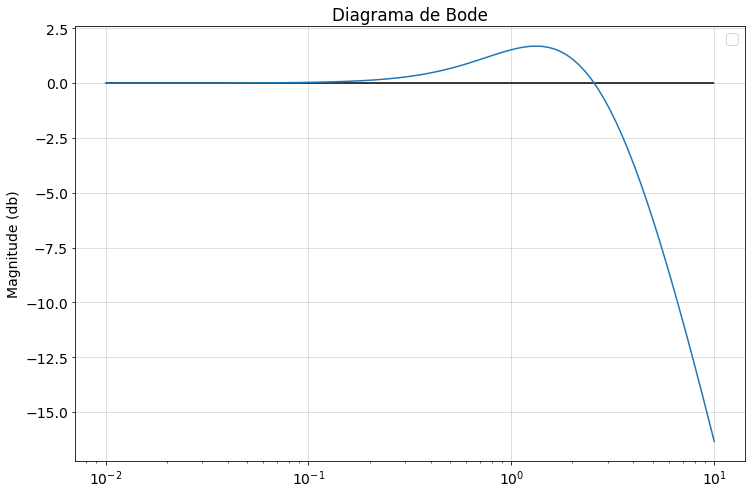

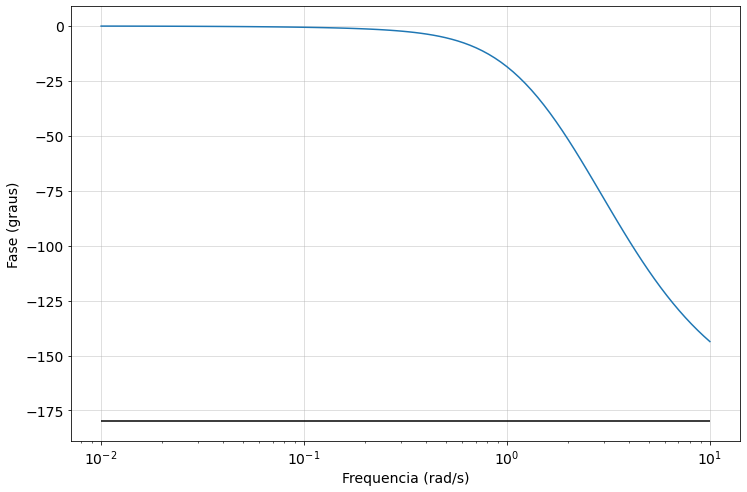

In [ ]:
tf = ([2.32, 2], [0.14, 1.028, 2.52, 2])
gm, pm, wg, wp = clt.margin(clt.tf(tf[0], tf[1]))

w, mag, phase = bode(tf)

plt.figure()
plt.semilogx(w, mag)   # Bode magnitude plot
plt.hlines(0, w[0], w[len(w)-1])
plt.grid(alpha=.5)
plt.title('Diagrama de Bode')
plt.ylabel('Magnitude (db)')
plt.legend()

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.hlines(-180, w[0], w[len(w)-1])
plt.ylabel('Fase (graus)')
plt.xlabel('Frequencia (rad/s)')
plt.grid(alpha=.5)

plt.show()